In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pcb-fault-detection/Data/data.yaml
/kaggle/input/pcb-fault-detection/Data/validation/labels.cache
/kaggle/input/pcb-fault-detection/Data/validation/labels/VID202106071444071-96_jpg.rf.7050ae838ef5bebe612d73e7d7c7c0c5.txt
/kaggle/input/pcb-fault-detection/Data/validation/labels/VID202106071443181-30_jpg.rf.a86badbe27c67e10f814a38e690f5ff0.txt
/kaggle/input/pcb-fault-detection/Data/validation/labels/VID202106071443181-132_jpg.rf.54bbf28fbac890737dc44ae7d2dac19f.txt
/kaggle/input/pcb-fault-detection/Data/validation/labels/VID202106071443181-84_jpg.rf.30bdb7e1b3037a8aedbbab700c63cf14.txt
/kaggle/input/pcb-fault-detection/Data/validation/labels/VID202106071443181-78_jpg.rf.3e5ae06e14f744353e2184cc2f07d802.txt
/kaggle/input/pcb-fault-detection/Data/validation/labels/VID202106071444271-6_jpg.rf.c1b7f2227ef36daaa45c71564743a7b9.txt
/kaggle/input/pcb-fault-detection/Data/validation/labels/VID202106071443181-48_jpg.rf.aca7e520b3acd2185ad1fcf46a25399c.txt
/kaggle/input/pcb-fault-det

In [17]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

In [12]:
def get_bound(x,y,w,h,img_w,img_h):
    x_min = (x-w/2)*img_w
    y_min = (y-h/2)*img_h
    width = w*img_w
    height = h*img_h
    return x_min,y_min,width,height

def show_object_location(location_path,image_size,ax):

    lst_colors = ['red','pink','purple','gray','black','blue','green','yellow','orange']
    legend_patches = []
    
    #讀取記事本中的物件座標和設定顏色
    f = open(location_path)
    for line in f.readlines():

        idx = int(line[0])
        legend_patches.append(patches.Patch(color=lst_colors[idx], label=str(idx)))

        lst_locations = [float(val) for val in line[2:].split(" ")]
        x_min,y_min,width,height = get_bound(lst_locations[0],lst_locations[1],
                                             lst_locations[2],lst_locations[3],
                                             image_size[1],image_size[0])

        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1.5, edgecolor=lst_colors[idx],alpha=0.8, facecolor='none')
        ax.add_patch(rect)
        
    f.close
    return legend_patches
def showData(image_path,show_label=True,title=""):
    '''
    顯示資料集圖片和標記物件位置
    '''

    label_path = ""
    if show_label & ('test' not in image_path):
        label_path = image_path
        label_path = label_path.replace('images','labels').replace('.jpg','.txt')

    _, ax = plt.subplots()
    image = img.imread(image_path)
    image_size = image.shape
    plt.imshow(image)
    
    if label_path != "":
        legend_patches = show_object_location(label_path,image_size,ax)
        ax.legend(handles=legend_patches, loc="upper right", bbox_to_anchor=(1.25, 1))
     
   
    if title=="":
        plt.title(image_size)
    else:
        plt.title(title)
    plt.show()

In [13]:
def getDataset(dataset_path):
    '''
    取得資料集圖片路徑和物件座標位置並轉成DataFrame
    '''
    if dataset_path[-1] !='/':
        dataset_path = dataset_path+'/'

    lst_dfs = []

    for data_type in ['train','validation','test']:
        dic = {'id':[],'data_type':[],'image_path':[],'classes':[],'x':[],'y':[],'width':[],'height':[]}
        i=0

        folder = f"{dataset_path}{data_type}/images/"

        for name in os.listdir(folder):
            if '.DS_Store' in name:
                continue
            
            if data_type=="test":
                
                dic['id'].append(i)

                #紀錄圖片路徑
                dic['image_path'].append(folder+name)
                dic['data_type'].append(data_type)
                #沒有物件座標
                for key in dic.keys():
                    if key not in ['image_path','data_type','id']:
                        dic[key].append(np.NaN)
            else:
                ooject_location_path = folder.replace('images','labels')+name.replace('.jpg','.txt')

                f = open(ooject_location_path)
                for line in f.readlines():
                    dic['id'].append(i)

                    #紀錄圖片路徑
                    dic['image_path'].append(folder+name)
                    dic['data_type'].append(data_type)
                    #紀錄座標
                    dic['classes'].append(line[0])
                    lst = line[2:].split(" ")
                    dic['x'].append(float(lst[0]))
                    dic['y'].append(float(lst[1]))
                    dic['width'].append(float(lst[2]))
                    dic['height'].append(float(lst[3]))

                f.close
            i+=1

        lst_dfs.append(pd.DataFrame(dic))
        df = pd.concat(lst_dfs)
        df = df.reset_index(drop=True)

    return df


In [14]:
df_dataset = getDataset('/kaggle/input/pcb-fault-detection/Data')

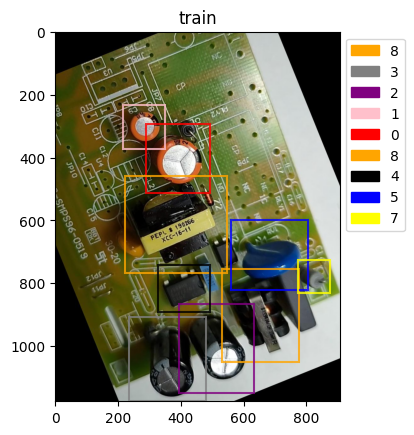

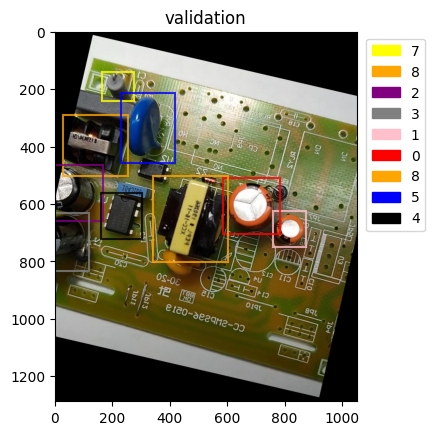

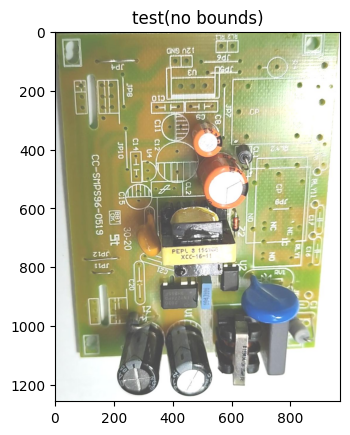

In [18]:
showData(df_dataset.loc[df_dataset['data_type']=='train']['image_path'].to_list()[0],title='train')
showData(df_dataset.loc[df_dataset['data_type']=='validation']['image_path'].to_list()[0],title='validation')
showData(df_dataset.loc[df_dataset['data_type']=='test']['image_path'].to_list()[0],title='test(no bounds)')

### 偵測的物件分佈

<h>8在每張圖片中都有2個</h>

dataset counts = 11230


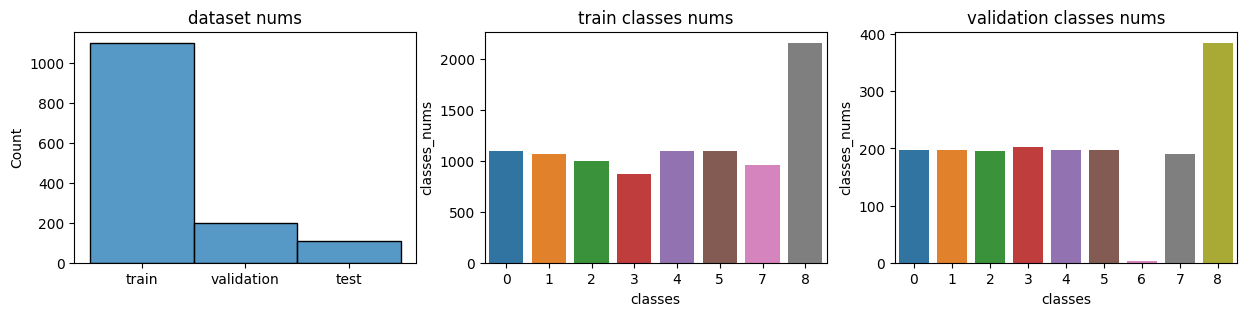

In [23]:
_, axes = plt.subplots(1,3,figsize=(15,3))

print("dataset counts =",len(df_dataset))
sns.histplot(df_dataset[['data_type','image_path']].drop_duplicates(),x='data_type',ax=axes[0])
axes[0].set_title('dataset nums')
axes[0].set_xlabel('')

lst = ['train','validation']
for i in range(2):
    df = df_dataset.loc[df_dataset['data_type']==lst[i]]['classes'].value_counts().to_frame('classes_nums')
    df['classes'] = df.index
    df.reset_index(drop=True,inplace=True)
    df = df.sort_values('classes')
    sns.barplot(df,x='classes',y='classes_nums',ax=axes[i+1])
    axes[i+1].set_title(lst[i]+" classes nums")
    axes[i+1].set_xlabel('classes')
del df
plt.show()

### 檢查classes=6是否為錯誤
<h>classes=6確實有物件</h>

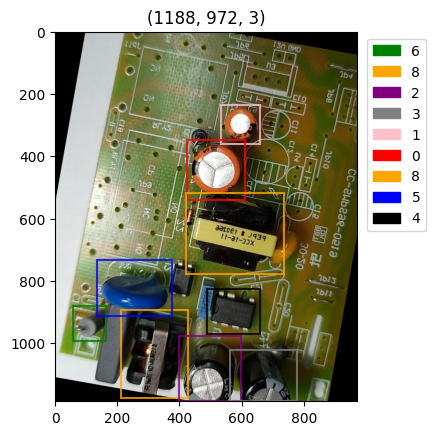

In [27]:
showData(df_dataset.loc[((df_dataset['data_type']=='validation')&(df_dataset['classes']=='6')),['image_path']]['image_path'].to_list()[0])

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 25.7 MB/s eta 0:00:0000:01


In [3]:
import torch
if torch.cuda.is_available():
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [4]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 108MB/s]


In [6]:
import yaml

In [7]:
cfg_path = '/kaggle/working/train_config.yaml'

In [8]:
config = {
'nc':9,
'names':['Cap1','Cap2','Cap3','Cap4','MOSFET','Mov','Resestor','Resistor','Transformer'],
'path': '/kaggle/input/pcb-fault-detection/Data/',
'train': 'train/images',
'val': 'validation/images'
}

with open('/kaggle/working/train_config.yaml', 'w') as f:
    yaml.dump(config, f)

### 開始fine-tuning
<h>因為是fine-tuning這邊減少學習率和不改變backbone特徵擷取能力進行微調</h>

In [9]:
results = model.train(data=cfg_path,
                        freeze=9,device=[0],
                        imgsz=640,optimizer='Adam',lr0=0.005,lrf=0.0001,epochs=100,patience=10)

Ultralytics 8.3.84 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/train_config.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=[0], workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=9, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 26.5MB/s]


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/pcb-fault-detection/Data/train/labels... 1099 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1099/1099 [00:04<00:00, 261.12it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/pcb-fault-detection/Data/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/pcb-fault-detection/Data/validation/labels... 200 images, 3 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:01<00:00, 196.60it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/pcb-fault-detection/Data/validation is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.005, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.43G      1.416      1.958      1.287        186        640: 100%|██████████| 69/69 [00:13<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        200       1765      0.231      0.573      0.376      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.36G      1.293     0.9652      1.227        183        640: 100%|██████████| 69/69 [00:11<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.22it/s]

                   all        200       1765      0.741      0.784      0.818      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.35G      1.207     0.8086        1.2        163        640: 100%|██████████| 69/69 [00:10<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.46it/s]

                   all        200       1765      0.812      0.835      0.855      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.35G      1.199     0.7478        1.2        203        640: 100%|██████████| 69/69 [00:10<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.56it/s]

                   all        200       1765       0.82      0.855      0.867      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.35G      1.151      0.693      1.178        182        640: 100%|██████████| 69/69 [00:11<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.65it/s]

                   all        200       1765      0.863      0.881      0.869      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.36G      1.111      0.653      1.162        168        640: 100%|██████████| 69/69 [00:10<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.55it/s]

                   all        200       1765      0.848      0.855      0.863      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.35G      1.132      0.641      1.174        134        640: 100%|██████████| 69/69 [00:11<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.64it/s]

                   all        200       1765       0.85      0.874       0.87      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.36G      1.104     0.6183      1.154        221        640: 100%|██████████| 69/69 [00:10<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.68it/s]

                   all        200       1765      0.851      0.867      0.868      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.35G      1.071     0.6041       1.14        183        640: 100%|██████████| 69/69 [00:10<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]

                   all        200       1765      0.863       0.87       0.87      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.35G      1.057     0.5806      1.134        187        640: 100%|██████████| 69/69 [00:11<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.68it/s]

                   all        200       1765      0.864      0.878      0.868      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.36G      1.043     0.5705      1.131        133        640: 100%|██████████| 69/69 [00:10<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.85it/s]

                   all        200       1765      0.853      0.854      0.867      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.35G       1.02     0.5456      1.114        182        640: 100%|██████████| 69/69 [00:10<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]

                   all        200       1765      0.861       0.88      0.869       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.37G      1.034     0.5526      1.119        179        640: 100%|██████████| 69/69 [00:10<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.61it/s]

                   all        200       1765       0.85      0.862      0.867      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.35G      1.024     0.5456      1.115        208        640: 100%|██████████| 69/69 [00:10<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.77it/s]

                   all        200       1765      0.858      0.857      0.866       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.35G      1.005     0.5305      1.108        221        640: 100%|██████████| 69/69 [00:10<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.57it/s]

                   all        200       1765      0.802      0.844      0.871      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.36G      1.006     0.5331      1.106        209        640: 100%|██████████| 69/69 [00:10<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.79it/s]

                   all        200       1765      0.865      0.882      0.868      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.36G     0.9723     0.5102      1.087        155        640: 100%|██████████| 69/69 [00:11<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.48it/s]

                   all        200       1765      0.865      0.879      0.868      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.36G     0.9785     0.5068      1.092        153        640: 100%|██████████| 69/69 [00:10<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.90it/s]

                   all        200       1765      0.865      0.883      0.869       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.36G     0.9857     0.5127      1.096        125        640: 100%|██████████| 69/69 [00:10<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.89it/s]

                   all        200       1765      0.864      0.883      0.871      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.35G     0.9996     0.5056      1.102        182        640: 100%|██████████| 69/69 [00:11<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.87it/s]

                   all        200       1765      0.867      0.883      0.869      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.35G     0.9709     0.4986      1.088        132        640: 100%|██████████| 69/69 [00:10<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.95it/s]

                   all        200       1765      0.866      0.883      0.869      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.37G     0.9523     0.4981      1.076        169        640: 100%|██████████| 69/69 [00:10<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.16it/s]

                   all        200       1765      0.866      0.881      0.869      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.37G     0.9604     0.4943      1.083        154        640: 100%|██████████| 69/69 [00:10<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.82it/s]

                   all        200       1765      0.866      0.882       0.87      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.35G      0.949     0.4907      1.073        165        640: 100%|██████████| 69/69 [00:10<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.90it/s]

                   all        200       1765      0.864      0.882      0.872      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.36G     0.9495      0.485      1.081        189        640: 100%|██████████| 69/69 [00:10<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.93it/s]

                   all        200       1765      0.864      0.881      0.866      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.36G     0.9674     0.4931      1.086        212        640: 100%|██████████| 69/69 [00:10<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.72it/s]

                   all        200       1765      0.862      0.881      0.866      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.36G     0.9837      0.489      1.093        145        640: 100%|██████████| 69/69 [00:10<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.88it/s]

                   all        200       1765      0.865      0.883      0.871      0.637
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 17, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



27 epochs completed in 0.098 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.84 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]


                   all        200       1765      0.865      0.879      0.868      0.697
                  Cap1        197        197      0.982          1      0.985      0.839
                  Cap2        197        197      0.985          1      0.991      0.759
                  Cap3        196        196      0.973       0.99      0.979      0.813
                  Cap4        196        202       0.98      0.947      0.971      0.723
                MOSFET        197        197      0.983          1      0.991      0.863
                   Mov        197        197      0.981          1      0.981      0.814
              Resestor          3          3          0          0          0          0
              Resistor        188        191      0.939      0.975      0.937       0.65
           Transformer        197        385      0.961      0.997      0.973      0.808


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/train


In [32]:
result = model(df_dataset.loc[df_dataset['data_type']=='test',['image_path']]['image_path'].to_list())


0: 640x640 1 Cap1, 1 Cap2, 2 Cap3s, 1 Cap4, 1 MOSFET, 1 Mov, 1 Resistor, 5 Transformers, 2.0ms
1: 640x640 1 Cap1, 1 Cap2, 1 Cap3, 1 Cap4, 1 MOSFET, 1 Mov, 1 Resistor, 2 Transformers, 2.0ms
2: 640x640 1 Cap1, 1 Cap2, 1 Cap3, 1 Cap4, 1 MOSFET, 1 Mov, 1 Resistor, 2 Transformers, 2.0ms
3: 640x640 1 Cap1, 1 Cap2, 1 Cap3, 1 Cap4, 1 MOSFET, 1 Mov, 2 Transformers, 2.0ms
4: 640x640 1 Cap3, 2 Cap4s, 1 MOSFET, 1 Mov, 1 Resistor, 2 Transformers, 2.0ms
5: 640x640 1 Cap1, 1 Cap2, 1 Cap3, 1 Cap4, 1 MOSFET, 2 Movs, 1 Resistor, 2 Transformers, 2.0ms
6: 640x640 1 Cap1, 1 Cap2, 1 Cap3, 1 Cap4, 1 MOSFET, 1 Mov, 1 Resistor, 2 Transformers, 2.0ms
7: 640x640 1 Cap1, 1 Cap2, 1 Cap3, 1 Cap4, 1 MOSFET, 1 Mov, 1 Resistor, 2 Transformers, 2.0ms
8: 640x640 1 Cap1, 1 Cap2, 1 Cap3, 1 MOSFET, 1 Mov, 1 Resistor, 2 Transformers, 2.0ms
9: 640x640 1 Cap1, 1 Cap2, 1 Cap3, 1 Cap4, 1 MOSFET, 1 Mov, 1 Resistor, 2 Transformers, 2.0ms
10: 640x640 1 Cap1, 3 Cap3s, 1 Cap4, 1 MOSFET, 1 Mov, 1 Resistor, 5 Transformers, 2.0ms
11: 

In [36]:
print(f"Test mAP@0.5: {results.maps}") 

Test mAP@0.5: [      0.839      0.7592     0.81338     0.72344     0.86312     0.81378           0     0.65018     0.80816]


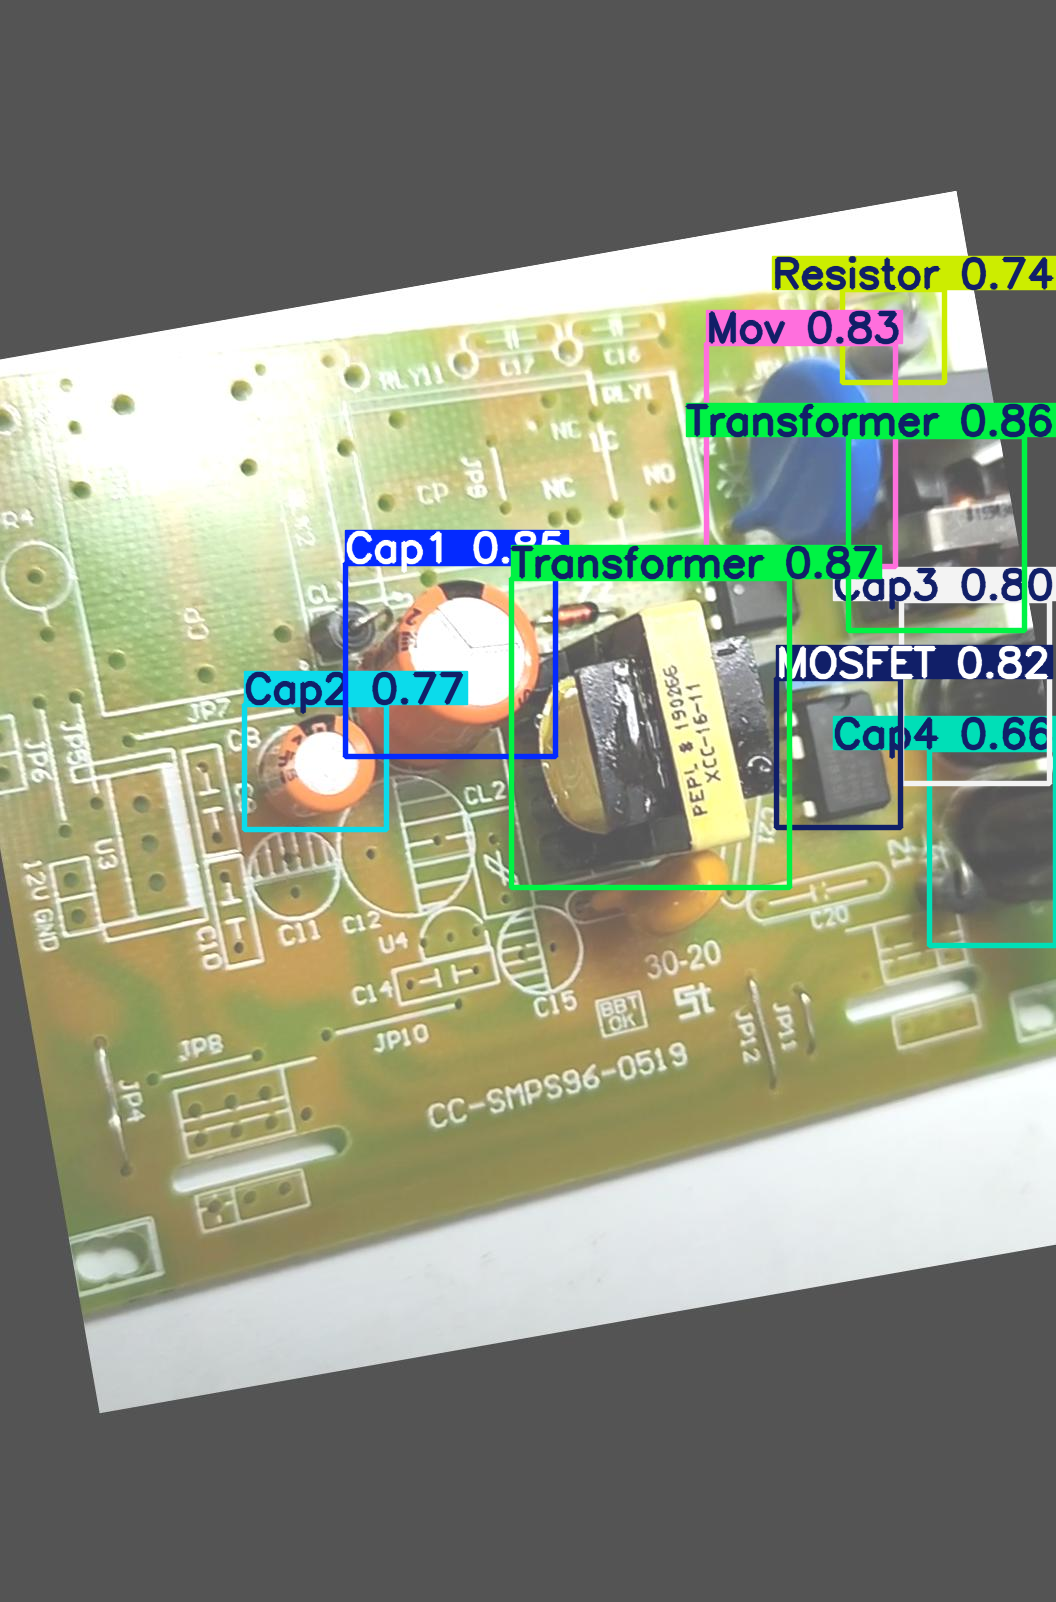

In [47]:
result[20].show()